In [207]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [208]:
n_neighbors = 15

In [209]:
# import some data to play with
iris = datasets.load_iris()

In [210]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [211]:
h = .02  # step size in the mesh

In [212]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

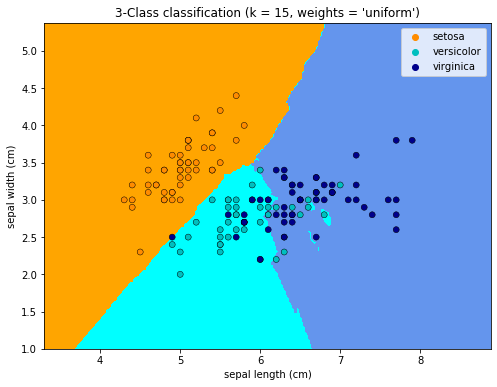

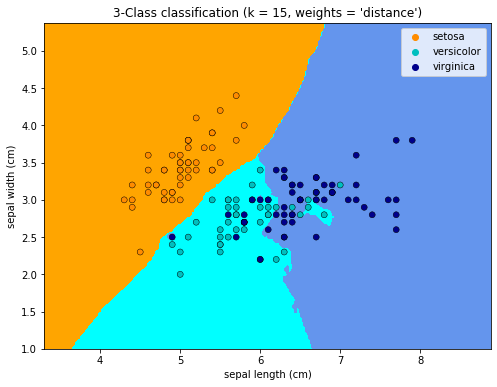

In [213]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

# Tasks

* What is the difference between the two plots in the Iris example above?

    - The first plot uses a uniform classification, where the majority vote of the k-nearest neighbors are used as a classifier.
    - The second plot uses a distance classification, where the total distance of each class of the k-nearest neighbors are calculated. The closest class is used as a classifier.

* Calculate the confusion matrix and explain the result. Why do you get the errors you get?

    - The columns represent the predicted values for each class
    - The rows represent the true values for each class
    - The diagonal shows the number of correctly predicted inputs
    - The off-diagonal values shows the number of incorrectly predicted inputs
        - 10 virginica was incorrectly classified as versicolor
        - 1 versicolor was incorrectly classified as virginica

    Interestingly, the model was trained on the same data it later tried to predict. Should it then not be 100% correct? The k-value might have something to do with this...

In [214]:
import sklearn
conf_matrix = sklearn.metrics.confusion_matrix(y, clf.predict(X))
conf_matrix

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0, 10, 40]], dtype=int64)

In [215]:
import pandas as pd

df = pd.DataFrame(conf_matrix, columns=[iris.target_names[0], iris.target_names[1], iris.target_names[2]])
df = df.rename(index={0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})
df

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,49,1
virginica,0,10,40


* Change the hyperparameter k. Which is the optimal value? What is the drawback of choosing a to large k or a to small k?

    - A too large k will smoothen out the boundaries between the classes too much and the accuracy of the prediction will decline
    - A too small k will overfit the model, make it unstable and sensitive to noise

In [268]:
# Use 4 (all) columns
#X = iris.data
#y = iris.target

# Use the two first columns
X = iris.data[:, :2]
y = iris.target

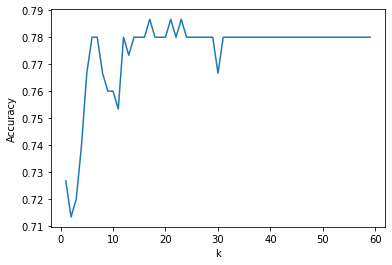

In [281]:
from sklearn.model_selection import cross_val_score

cv_scores = []
my_range = range(1, 60)

for k in my_range:
    knn_cv = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    cv_scores.append(cross_val_score(knn_cv, X, y, cv = 5, scoring='accuracy').mean())

cv_scores
df_scores = pd.DataFrame(cv_scores, index = my_range)
df_scores.plot(xlabel = 'k', ylabel = 'Accuracy', legend = False)

In [280]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = neighbors.KNeighborsClassifier(weights = 'distance')

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 60)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

#check top performing n_neighbors value
print('Best k:\t', knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print('Score:\t', knn_gscv.best_score_)

Best k:	 {'n_neighbors': 17}
Score:	 0.7866666666666666


Optimal k-value for uniform weight is 35 using the two first features.

* One hyperparameter is weights. What is the difference between ‘uniform’ and ‘distance’?

    - Uniform: The majority vote of the k-nearest neighbors are used as a classifier.
    - Distance: The total distance to each class of the k-nearest neighbors are used as a classifier. The class closest to the data point is assigned.

* In the Iris data set there is four different features. Which are these?

In [249]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* Do you need all features? What happens performance wise if you only use two features? Which to do you choose and why?

    - 4 (all) features:
        - Accuracy: 98%
        - Optimal k: 6

    - 2 features:
        - Accuracy: 83%
        - Optimal k: 35

I would choose all four features because of the higher accuracy. Also, the lower k-value results in less computation.

* Use the standard scaler on the iris data set. Do you get a different result now? Can you explain the difference or that there is no difference?

    - There is no difference using scaled values, both using uniform and distance weights. The reason is that the different feature values are close to eachother to start with.

In [274]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

In [275]:
print('Original means:\t\t', scaler.mean_)
print('Original variance:\t', scaler.scale_)

Original means:		 [5.84333333 3.05733333]
Original variance:	 [0.82530129 0.43441097]


In [276]:
X_scaled = scaler.transform(X)

In [277]:
print('Scaled means:\t', X_scaled.mean(axis = 0))
print('Scaled stddev:\t', X_scaled.std(axis = 0))

Scaled means:	 [-1.69031455e-15 -1.84297022e-15]
Scaled stddev:	 [1. 1.]


In [279]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = neighbors.KNeighborsClassifier(weights = 'distance')

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 60)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

#check top performing n_neighbors value
print('Best k:\t', knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print('Score:\t', knn_gscv.best_score_)

Best k:	 {'n_neighbors': 17}
Score:	 0.7866666666666666
